In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [32]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingClassifier #GradientBoostingRegressor

In [3]:
data = pd.read_csv('./Datasets/Heart_Disease_UCI/heart.csv')
#https://www.kaggle.com/ronitf/heart-disease-uci

In [4]:
data.columns
data.notnull().count()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [5]:
data.describe()
data.dtypes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [34]:
data.corr().sort_values(by='exang', axis=1)
data.describe().sort_values(by='std', axis=1)

,target,cp,thalach,slope,restecg,fbs,chol,trestbps,age,ca,sex,thal,oldpeak,exang
age,-0.225439,-0.068653,-0.398522,-0.168814,-0.116211,0.121308,0.213678,0.279351,1.000000,0.276326,-0.098447,0.068001,0.210013,0.096801
sex,-0.280937,-0.049353,-0.044020,-0.030711,-0.058196,0.045032,-0.197912,-0.056769,-0.098447,0.118261,1.000000,0.210041,0.096093,0.141664
cp,0.433798,1.000000,0.295762,0.119717,0.044421,0.094444,-0.076904,0.047608,-0.068653,-0.181053,-0.049353,-0.161736,-0.149230,-0.394280
trestbps,-0.144931,0.047608,-0.046698,-0.121475,-0.114103,0.177531,0.123174,1.000000,0.279351,0.101389,-0.056769,0.062210,0.193216,0.067616
chol,-0.085239,-0.076904,-0.009940,-0.004038,-0.151040,0.013294,1.000000,0.123174,0.213678,0.070511,-0.197912,0.098803,0.053952,0.067023
fbs,-0.028046,0.094444,-0.008567,-0.059894,-0.084189,1.000000,0.013294,0.177531,0.121308,0.137979,0.045032,-0.032019,0.005747,0.025665
restecg,0.137230,0.044421,0.044123,0.093045,1.000000,-0.084189,-0.151040,-0.114103,-0.116211,-0.072042,-0.058196,-0.011981,-0.058770,-0.070733
thalach,0.421741,0.295762,1.000000,0.386784,0.044123,-0.008567,-0.009940,-0.046698,-0.398522,-0.213177,-0.044020,-0.096439,-0.344187,-0.378812
exang,-0.436757,-0.394280,-0.378812,-0.257748,-0.070733,0.025665,0.067023,0.067616,0.096801,0.115739,0.141664,0.206754,0.288223,1.000000
oldpeak,-0.430696,-0.149230,-0.344187,-0.577537,-0.058770,0.005747,0.053952,0.193216,0.210013,0.222682,0.096093,0.210244,1.000000,0.288223


,fbs,sex,exang,target,restecg,thal,slope,ca,cp,oldpeak,age,trestbps,thalach,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.148515,0.683168,0.326733,0.544554,0.528053,2.313531,1.399340,0.729373,0.966997,1.039604,54.366337,131.623762,149.646865,246.264026
std,0.356198,0.466011,0.469794,0.498835,0.525860,0.612277,0.616226,1.022606,1.032052,1.161075,9.082101,17.538143,22.905161,51.830751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,94.000000,71.000000,126.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,47.500000,120.000000,133.500000,211.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.800000,55.000000,130.000000,153.000000,240.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.600000,61.000000,140.000000,166.000000,274.500000
max,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,4.000000,3.000000,6.200000,77.000000,200.000000,202.000000,564.000000


In [7]:
data.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

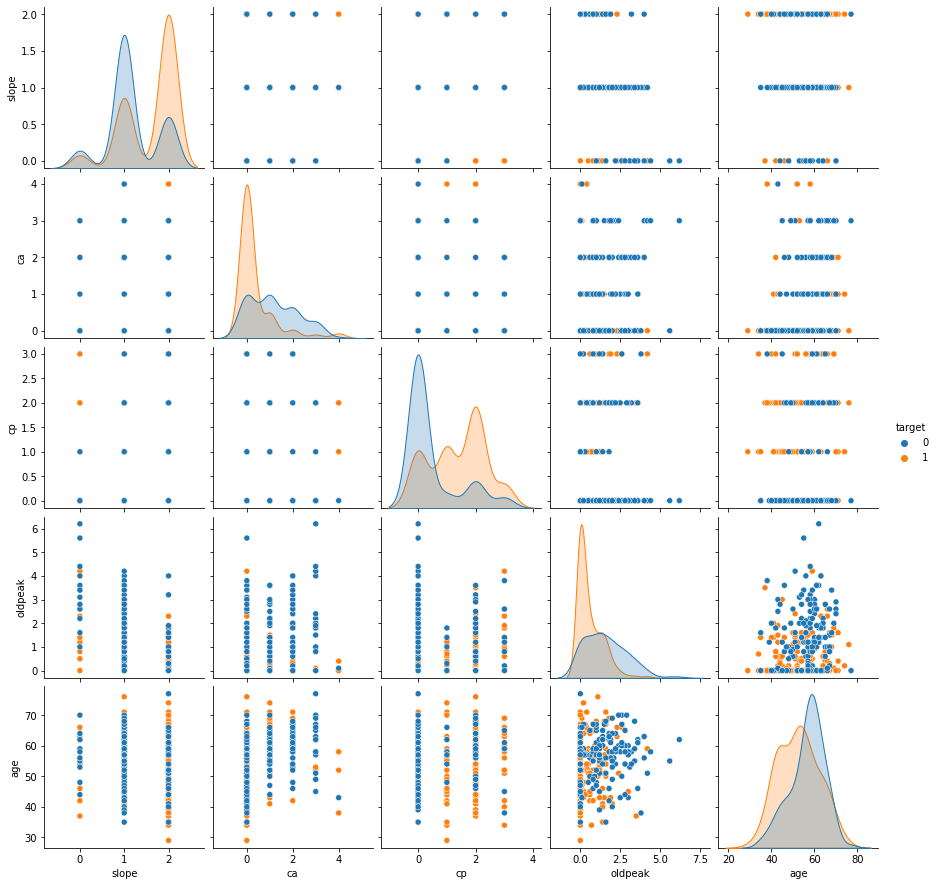

In [8]:
local_columns = ['sex', 'ca', 'cp', 'oldpeak', 'age', 'target']
sns.pairplot(data[local_columns], hue='target')

## Tree classifier

In [5]:
d_tree_c = DecisionTreeClassifier()
col_for_tree = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
X_train, X_test, Y_train, Y_test = train_test_split(data[col_for_tree], \
                                                    data['target'], stratify=data['target'])
d_tree_c.fit(X_train, Y_train)
tree_prediction = d_tree_c.predict(X_test)
print(classification_report(Y_test, tree_prediction))
print(confusion_matrix(Y_test, tree_prediction))

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        35
           1       0.78      0.76      0.77        41

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76

[[26  9]
 [10 31]]


<Figure size 3600x3600 with 0 Axes>

[Text(1267.4085365853657, 2594.4545454545455, 'X[2] <= 0.5\ngini = 0.496\nsamples = 227\nvalue = [103, 124]'),
 Text(748.5365853658536, 2347.3636363636365, 'X[9] <= 0.7\ngini = 0.386\nsamples = 107\nvalue = [79, 28]'),
 Text(476.3414634146341, 2100.272727272727, 'X[11] <= 0.5\ngini = 0.495\nsamples = 40\nvalue = [18, 22]'),
 Text(340.2439024390244, 1853.181818181818, 'X[0] <= 41.5\ngini = 0.384\nsamples = 27\nvalue = [7, 20]'),
 Text(272.1951219512195, 1606.090909090909, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(408.29268292682923, 1606.090909090909, 'X[4] <= 327.5\ngini = 0.278\nsamples = 24\nvalue = [4, 20]'),
 Text(340.2439024390244, 1359.0, 'X[10] <= 1.5\ngini = 0.227\nsamples = 23\nvalue = [3, 20]'),
 Text(272.1951219512195, 1111.909090909091, 'X[3] <= 156.0\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(204.14634146341461, 864.8181818181818, 'X[7] <= 159.0\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(136.09756097560975, 617.7272727272725, 'X[0] <= 60.5\ngini =

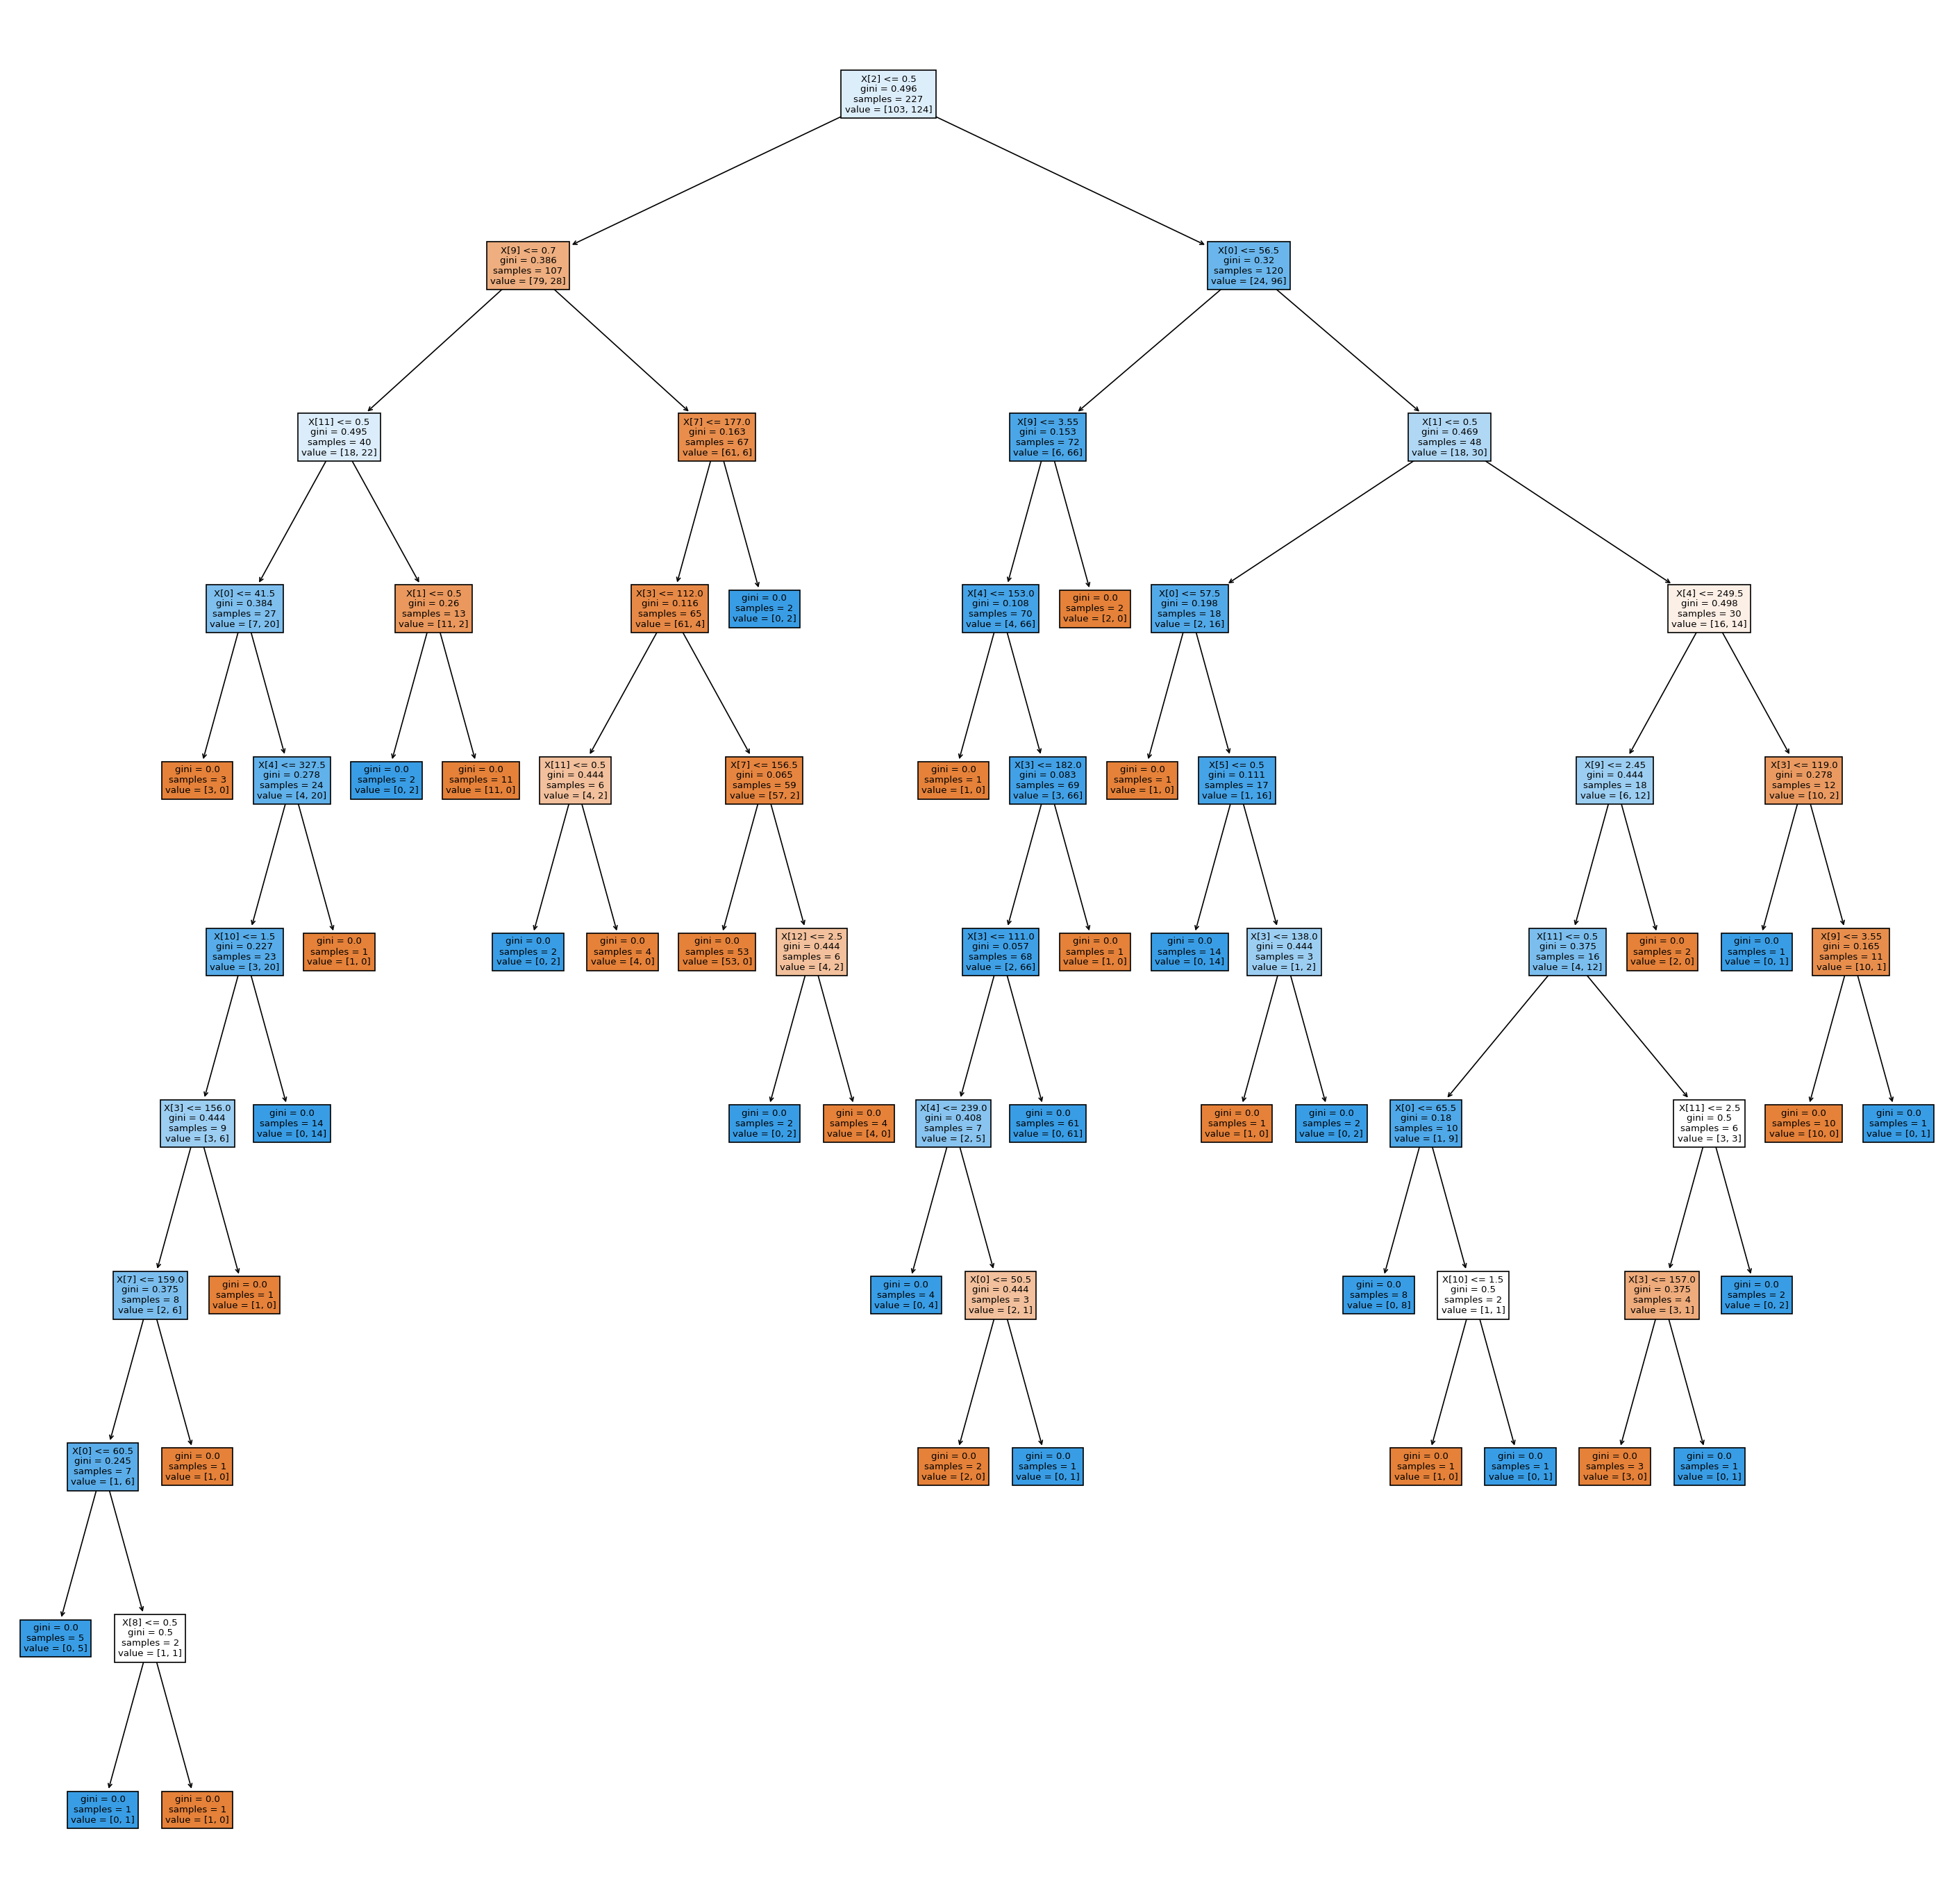

In [6]:
plt.figure(figsize=(30, 30), dpi= 120)
plot_tree(d_tree_c, filled=True)

In [7]:
#columns_for_d_tree_c
for i in np.argsort(d_tree_c.feature_importances_):
    print(col_for_tree[i], '--->', d_tree_c.feature_importances_[i])

restecg ---> 0.0
fbs ---> 0.004878932468696848
exang ---> 0.008886626996554965
slope ---> 0.019705129427143604
thal ---> 0.023697671990813237
thalach ---> 0.052441187603869524
sex ---> 0.0657230627360599
chol ---> 0.07444160005809809
trestbps ---> 0.08181998599514775
ca ---> 0.10141135166581455
age ---> 0.11663276143181628
oldpeak ---> 0.1590328189363048
cp ---> 0.29132887068968044


In [15]:
d_tree_c = DecisionTreeClassifier()
col_for_tree = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
X_train, X_test, Y_train, Y_test = train_test_split(data[col_for_tree], \
                                                    data['target'], stratify=data['target'])
my_sample_weight = [1 if i == 0 else 10 for i in Y_train]
d_tree_c.fit(X_train, Y_train, sample_weight=my_sample_weight)
tree_prediction = d_tree_c.predict(X_test)
print(classification_report(Y_test, tree_prediction))
print(confusion_matrix(Y_test, tree_prediction))

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        35
           1       0.79      0.83      0.81        41

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76

[[26  9]
 [ 7 34]]


## Tree classifier with PCA

In [20]:
d_tree_c = DecisionTreeClassifier()
col_for_tree = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
X_train, X_test, Y_train, Y_test = train_test_split(data[col_for_tree], \
                                                    data['target'], stratify=data['target'], test_size=0.3)
#my_sample_weight = [1 if i == 0 else 10 for i in Y_train]
pca = PCA(n_components=(len(col_for_tree)-2)) 
pca_X_train = pca.fit_transform(X_train)  
pca_X_test = pca.transform(X_test)

d_tree_c.fit(pca_X_train, Y_train)
tree_prediction = d_tree_c.predict(pca_X_test)
print(classification_report(Y_test, tree_prediction))
print(confusion_matrix(Y_test, tree_prediction))

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.77      0.66      0.71        41
           1       0.75      0.84      0.79        50

    accuracy                           0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91

[[27 14]
 [ 8 42]]


## Random Forest Regressor

In [31]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']#, 'target']
X_train, X_test, Y_train, Y_test = train_test_split(data[columns], 
                                                    data['target'], stratify=data['target'], test_size=0.3)

rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, Y_train)
predictions = rfr.predict(X_test)
print(r2_score(Y_test, predictions))

predictions = [1 if i > 0.5 else 0 for i in predictions]
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))

RandomForestRegressor(n_estimators=20)

0.5250243902439025
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.87      0.78      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91

[[35  6]
 [11 39]]


## GradientBoostingClassifier

In [39]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']#, 'target']
X_train, X_test, Y_train, Y_test = train_test_split(data[columns], 
                                                    data['target'], stratify=data['target'], test_size=0.3)
learning_rate = [0.1, 0.25, 0.5, 0.75, 1.0]
gbc = GradientBoostingClassifier(n_estimators=250, verbose=True, learning_rate=learning_rate[2])
gbc.fit(X_train, Y_train)
gbc.staged_decision_function(X_train)
#
predictions = gbc.predict(X_test)
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))

      Iter       Train Loss   Remaining Time 
         1           0.9517            0.43s
         2           0.7637            0.37s
         3           0.6587            0.35s
         4           0.5758            0.34s
         5           0.5209            0.32s
         6           0.4696            0.32s
         7           0.4121            0.32s
         8           0.3655            0.31s
         9           0.3336            0.30s
        10           0.3079            0.30s
        20           0.1475            0.26s
        30           0.0708            0.25s
        40           0.0394            0.24s
        50           0.0218            0.22s
        60           0.0125            0.20s
        70           0.0073            0.19s
        80           0.0041            0.17s
        90           0.0025            0.16s
       100           0.0014            0.14s
       200           0.0000            0.04s


GradientBoostingClassifier(learning_rate=0.5, n_estimators=250, verbose=True)

<generator object GradientBoostingClassifier.staged_decision_function at 0x7f8ccc9e3dd0>

              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91

[[29 12]
 [ 7 43]]
